###<b>Firstly I imported all the libraries necessary for the analysis:</b>

<b>Numpy</b>: numpy is used to handle the  multidimensional arrays.<br>
<b>Pandas</b>: Pandas is used for data manipulation and analysis.<br>
<b>Wordcloud:</b> Wordcloud is used built and generate wordclouds in python.<br>
<b>Matplotlib:</b> matplotlib is used to plot attractive graphs in python.<br>
<b>Seaborn:</b> Seaborn is also used to plot graphs in python but seaborn plots are more attractive and effecient to build.


In [ ]:
# importing all the required packages and libraries.

import numpy as np
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

####<b>The below cell reads the excel file from sample(Google Colab). Don't forget to upload the file in sample data in the left side. 

In [ ]:
# Reading the fatalities file.

from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_excel('/content/sample_data/MPV_DATASET.xlsx')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


####The next cell takes all the columns required and drops all the columns not required

In [ ]:
# taking all the required columns 

df = df[['Victim\'s name', 'Victim\'s age', 'Victim\'s gender', 'Victim\'s race', 'Date of Incident (month/day/year)',
         'City', 'State', 'Zipcode', 'County', 'Agency responsible for death', 
         'Cause of death', 'A brief description of the circumstances surrounding the death', ]]

Now we drop the null values

In [ ]:
#Droppoing all null values
df = df.dropna()

##<b>Here we start building the wordcloud. </b>

Firstly we make text variable which contains all the characters in <i>'A brief description of the circumstances surrounding the death'</i> column.

In [ ]:
#to plot wordcloud text variable contains all the data in 'A brief description of the circumstances surrounding the death' to a text.

text = " ".join(cat.split()[1] for cat in df['A brief description of the circumstances surrounding the death'])

In this cell we generate the wordcloud.

In [ ]:
#Creating a wordcloud variable to generate wordcloud of the given text.

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

Now finally we plot the worcloud using matplotlib variables.

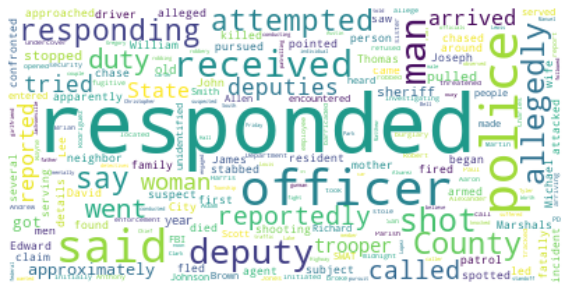

In [ ]:
# Finally using matplotlib to plot the wordcloud

plt.figure(figsize =(10,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##<b>Wordcloud Analysis:</b>

The analysis that can be made using wordcloud are:

1. Responded is the most common word in the descriptions. This might be due the victims responded after the attack or how police responded to fatality.<br>
2. The other common words are 'police' and 'officer'. <br>
3. Next we can see that the word 'deputy' is highlighted. This means deputy officer are considered most of the time. 

Now we move ahead with more data cleaning. 

In [ ]:
#dropping all the rows with unknown values.

df = df.drop(df[df['Victim\'s age']=='Unknown'].index)
df = df.drop(df[df['Victim\'s gender']=='Unknown'].index)
df = df.drop(df[df['Victim\'s race']=='Unknown race'].index)


Creating a dataframe for states and race of the victim so that we can see are people with common race are targeted more or not.  

In [ ]:
#Creating a dataframe for having count of victims of each race in different counties 

df_state_Victim_Race = df.groupby(['State', 
                                   'Victim\'s race'], 
                                  as_index = False).count()[['State',
                                                             'Victim\'s race'
                                                             , 'Victim\'s age']].rename(columns = {'Victim\'s age': 'count'})


In [ ]:
df_state_Victim_Race 

,State,Victim's race,count
0,AK,Black,4
1,AK,Hispanic,1
2,AK,Native American,14
3,AK,Pacific Islander,1
4,AK,White,28
...,...,...,...
210,WV,Black,10
211,WV,White,58
212,WY,Hispanic,3
213,WY,Native American,2


Building the barplot state, victim's race, and count

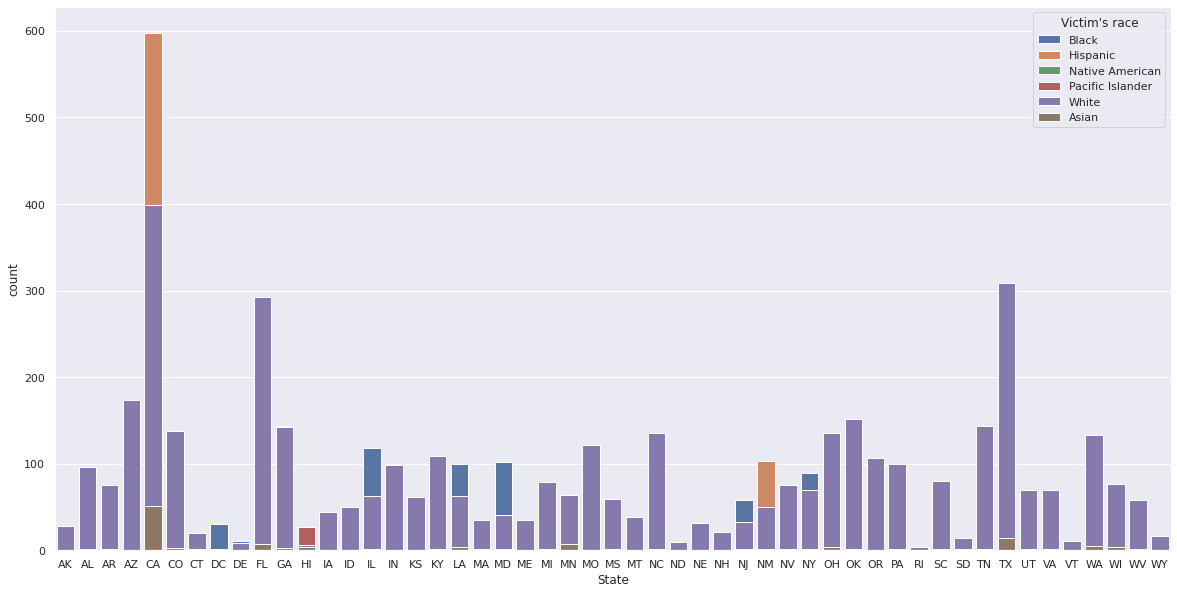

In [ ]:
#plotting a barplot for the above dataframe. 

sns.set(rc = {'figure.figsize':(20,10)})
g = sns.barplot(data = df_state_Victim_Race, x = 'State',
                y = 'count', hue = 'Victim\'s race', dodge = False)


##<b>Barplot State vs Count and Race Analysis:</b>

1. Mostly white people are the victims of police fatalities. 
2. In New Mexico and California the highest number of victims are Hispanic.
3. In Hawai pacific Islanders are mostly the victims.
4. Black people are the highest victims in some states.
5. Asians and Native Americans are the least attacked communities.    

Moving ahead with data cleaning that is to be used further in analysis.

In [ ]:
# Dropping all the values of 40s in column victims age and checking whether the values are integer or not.

df.drop(df[df['Victim\'s age'] == '40s'].index, inplace = True)
df.astype({'Victim\'s age': 'int32'}).dtypes

Victim's name                                                             object
Victim's age                                                               int32
Victim's gender                                                           object
Victim's race                                                             object
Date of Incident (month/day/year)                                 datetime64[ns]
City                                                                      object
State                                                                     object
Zipcode                                                                  float64
County                                                                    object
Agency responsible for death                                              object
Cause of death                                                            object
A brief description of the circumstances surrounding the death            object
dtype: object

Dividing the age into buckets of age groups.

In [ ]:
# bucketing age in to age groups of child, youth, adult, and senior 

conditions = [
    (df['Victim\'s age'] <= 14),
    (df['Victim\'s age'] > 14) & (df['Victim\'s age'] <= 24),
    (df['Victim\'s age'] > 24) & (df['Victim\'s age'] <= 65),
    (df['Victim\'s age'] > 65)
    ]

values = ['children', 'youth', 'adult', 'senior']

df['Age_Group'] = np.select(conditions, values)

df.head()

,Victim's name,Victim's age,Victim's gender,Victim's race,Date of Incident (month/day/year),City,State,Zipcode,County,Agency responsible for death,Cause of death,A brief description of the circumstances surrounding the death,Age_Group
13,Michael Scott Meredith,35,Male,White,2022-01-12,Sergeant Bluff,IA,51054.0,Woodbury,Woodbury County Sheriff's Office,Gunshot,Police responded to reports of a burglary at a...,adult
21,Orlando Taylor III,23,Male,Black,2022-01-09,Springfield,MA,1104.0,Hampden,Springfield Police Department,Gunshot,Police responded to reports of Taylor allegedl...,youth
23,Deaughn Willis,25,Male,Black,2022-01-08,Baton Rouge,LA,70817.0,East Baton Rouge,"Baton Rouge Police Department, East Baton Roug...",Gunshot,Police went to an apartment complex looking fo...,adult
32,Roman Ivan Kokhanevych,24,Male,White,2022-01-04,Gresham,OR,97030.0,Multnomah,"Gresham Police Department, Multnomah County Sh...",Gunshot,Police were called to an armed robbery happeni...,youth
36,Charles Corey Castro,54,Male,Hispanic,2022-01-03,Murphy,ID,83650.0,Owyhee,Owyhee County Sheriff's Office,Gunshot,Deputies were called to an address to serve a ...,adult


Creating a dataframe df_age_group for having people count in different age groups.

In [ ]:
# counting the number of people of all age groups 
df_age_group = df.groupby(['Age_Group'], 
                                  as_index = False).count()[['Age_Group',
                                                            'Victim\'s age']]
df_age_group

,Age_Group,Victim's age
0,adult,6925
1,children,26
2,senior,211
3,youth,1542


PLotting a pie chart for this data frame

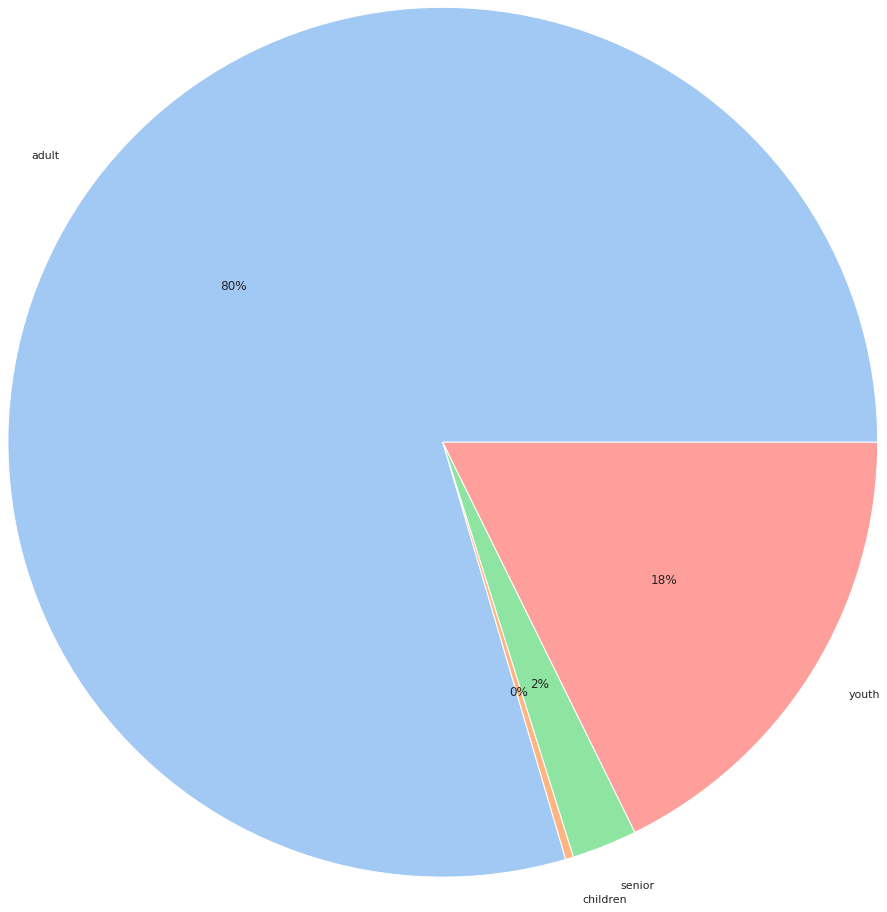

In [ ]:
#pie chart for distribution of victims on age group

colors = sns.color_palette('pastel')[0:5]
plt.pie(df_age_group["Victim's age"], labels = df_age_group['Age_Group'], colors = colors, autopct='%.0f%%', radius=2)



plt.show()

The DataFrame clearly shows that Adults are mostly victims of police fatalities followed by youths.
Suprisingly even children are victims of the fatalities.

Now we check what is the number of people in different age groups in different states.

In [ ]:
#statewise victims age distribution distribution 

df_state_Victim_age = df.groupby(['State', 
                                   'Age_Group'], 
                                  as_index = False).count()[['State',
                                                             'Age_Group',
                                                            'Victim\'s age']].rename(columns = {'Victim\'s age': 'count'})

In [ ]:
df_state_Victim_age 

,State,Age_Group,count
0,AK,adult,39
1,AK,youth,9
2,AL,adult,139
3,AL,senior,7
4,AL,youth,21
...,...,...,...
152,WV,adult,61
153,WV,senior,3
154,WV,youth,5
155,WY,adult,19


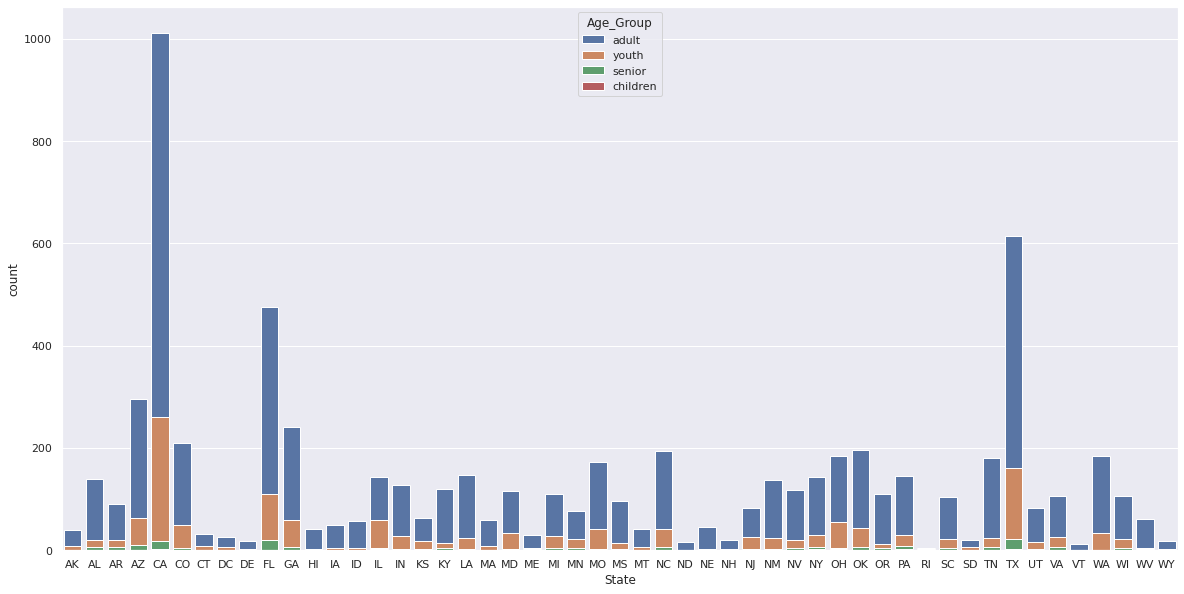

In [ ]:
#Bar plot for distribution of age group statewise

sns.set(rc = {'figure.figsize':(20,10)})
g = sns.barplot(data = df_state_Victim_age, x = 'State',
                y = 'count', hue = 'Age_Group', dodge = False)


##<b>Analysis</b>
We see that in all states the adults are the highest number of victims.

Now we look at the distribution of cause of death.

In [ ]:
#Distribution of cause of death

df_cause_of_death = df.groupby(['Cause of death'
                                   ], 
                                  as_index = False).count()[['Cause of death', 'City']].sort_values(by="City", ascending = False).rename(columns = {'City': 'count'})

In [ ]:
#taking log because to avoid large values
df_cause_of_death['City_log_base'] = np.log2(df_cause_of_death['count'] + 1)
df_cause_of_death

,Cause of death,count,City_log_base
7,Gunshot,8024,12.970286
13,"Gunshot, Taser",265,8.055282
22,Taser,239,7.906891
20,Physical Restraint,38,5.285402
28,Vehicle,37,5.247928
3,Beaten,30,4.954196
27,Tasered,18,4.247928
21,Physical restraint,8,3.169925
0,Asphyxiated,8,3.169925
18,Other,6,2.807355


Plotting a bar plot for all the above analysis

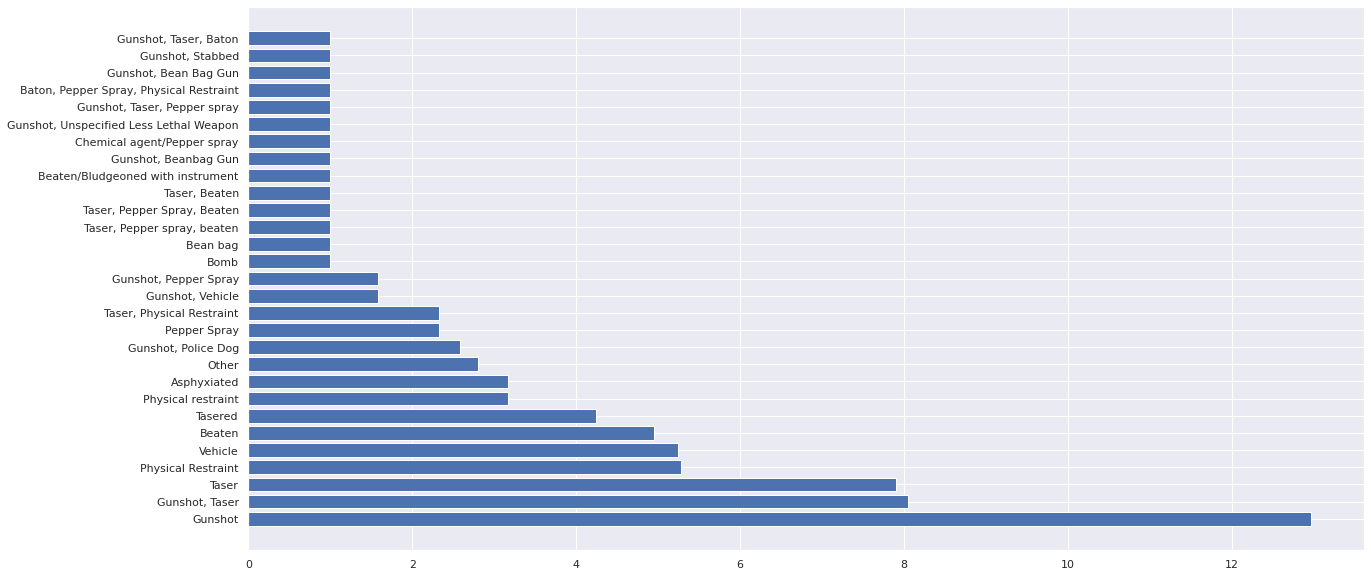

In [ ]:
#Horizontal bar plot 
plt.barh(df_cause_of_death['Cause of death'], df_cause_of_death['City_log_base']) 
plt.show()

###<b>Cause of death Analysis</b>

Gunshot and taser gun are the most common type of cause of deaths.

In [ ]:
# Creating the year and month columns in the original dataframe

df['year'] = pd.DatetimeIndex(df['Date of Incident (month/day/year)']).year
df['month'] = pd.DatetimeIndex(df['Date of Incident (month/day/year)']).month

In [ ]:
#Counting values for each month of a particular year 
df_month_year = df.groupby(["year", "month"], as_index = False).count()[["year","month","City"]]

In [ ]:
df_month_year

,year,month,City
0,2013,1,85
1,2013,2,47
2,2013,3,76
3,2013,4,70
4,2013,5,88
...,...,...,...
104,2021,9,75
105,2021,10,89
106,2021,11,59
107,2021,12,58


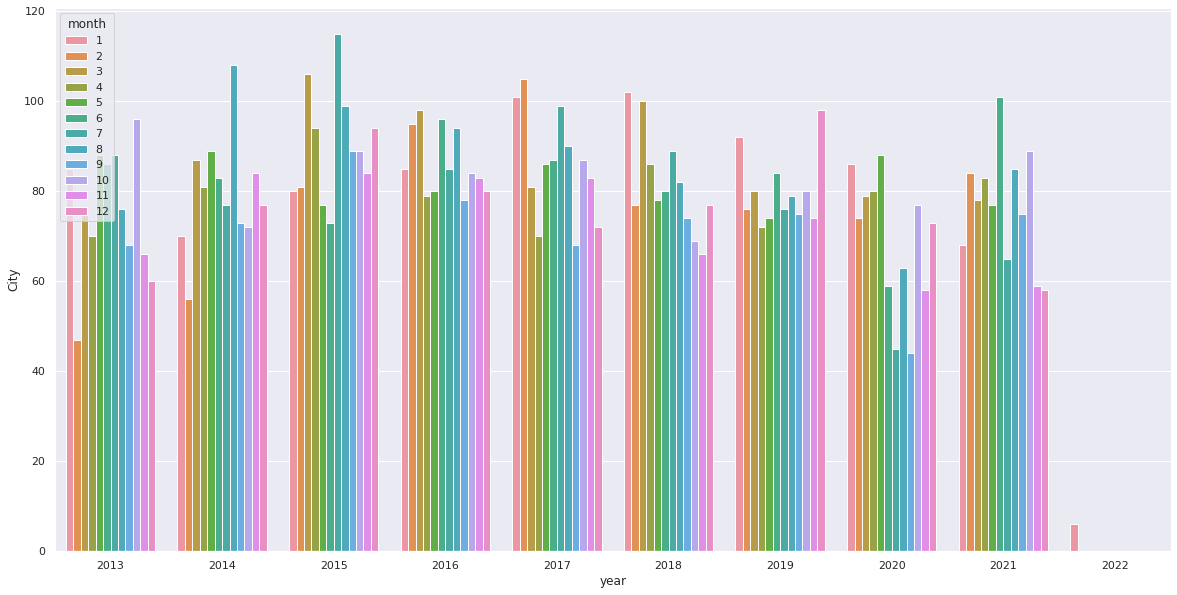

In [ ]:
# Yearly and monthly bar plots 

sns.barplot(x = "year", y = 'City', data = df_month_year, hue = 'month',
                 )
plt.show()

<b>Analysis over the months and years.</b>

There is not much we can over the years in this bar graph but it can be seen that during covid all the fatalities were reduced which can be clearly seen in the next graph. But that is not the end again 2021 the numbers of fatalities incresed.

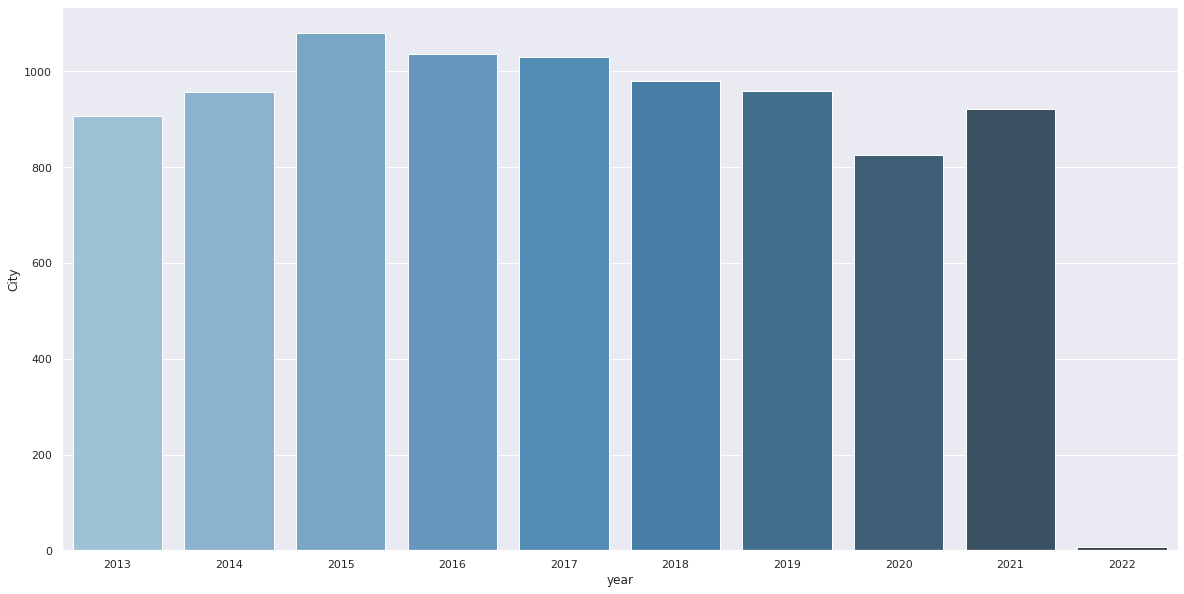

In [ ]:
#Yearly plot

df_year = df.groupby(["year"], as_index = False).count()[["year","City"]]
sns.barplot(x = "year", y = 'City', data = df_year,
                 palette="Blues_d")

<b> This is the continuation of the previous graph and it can be easily seen that fatalities reduced in 2020 due to clear reason of COVID. 

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

In [ ]:
import geopandas

In [ ]:
!pip install pgeocode

In [ ]:
!pip install pandas_bokeh

##Now further I will be using the zipcodes to plot a map showing the results of fatalities in previous times. 

In [ ]:
#Counting Count based on Zipcode

df_county_zipcode = df.groupby(['State','Zipcode'], 
                                  as_index = False).count()[['State','Zipcode', 'City']].sort_values(by = "City", ascending = False).rename(columns = {'City': 'count'})

In [ ]:
df_county_zipcode

,State,Zipcode,count
737,CA,93307.0,14
234,AZ,85009.0,10
3375,NM,88001.0,10
3352,NM,87121.0,10
415,CA,90044.0,10
...,...,...,...
2316,LA,70360.0,1
2318,LA,70364.0,1
2319,LA,70377.0,1
2320,LA,70394.0,1


In [ ]:
# Adding longitude and latitude columns to the dataframe

import pandas_bokeh
import pgeocode

import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
pandas_bokeh.output_notebook()
import plotly.graph_objects as go



nomi = pgeocode.Nominatim('us')

df_county_zipcode['Zipcode'] = df_county_zipcode['Zipcode'].astype(int).astype(str)

df_county_zipcode['Latitude'] = (nomi.query_postal_code(df_county_zipcode['Zipcode'].tolist()).latitude)
df_county_zipcode['Longitude'] = (nomi.query_postal_code(df_county_zipcode['Zipcode'].tolist()).longitude)

df_county_zipcode

,State,Zipcode,count,Latitude,Longitude
737,CA,93307,14,40.4109,-104.7541
234,AZ,85009,10,34.1283,-117.2087
3375,NM,88001,10,25.7864,-80.2042
3352,NM,87121,10,29.3918,-82.1062
415,CA,90044,10,32.7332,-117.0326
...,...,...,...,...,...
2316,LA,70360,1,31.7763,-106.4932
2318,LA,70364,1,31.7674,-106.4304
2319,LA,70377,1,31.7089,-106.3293
2320,LA,70394,1,31.8218,-106.5732


In [ ]:
# Plotting a map for the same values using the longitude and latitude

fig = go.Figure(data=go.Scattergeo(
        lon = df_county_zipcode['Longitude'],
        lat = df_county_zipcode['Latitude'],
        text = df_county_zipcode['count'],
        mode = 'markers',
        marker_color = df_county_zipcode['count'],
        ))

fig.update_layout(
        title = 'County wise Distribution.',
        geo_scope='usa',
    )
fig.show()


<b> Analysis of Map</b><br>
It can be clearly seen that east or the right side of United States has way more times fatalities than the left part. There could be various reasons for this like population distribution, police department, weather etc. Only California is a place where the fatalities are highest in west coast.

Keep file nst-est2019-01.xlsx in sample_data in content.

In [ ]:
df_population_statewise = pd.read_excel('/content/sample_data/nst-est2019-01.xlsx')

In [ ]:
df_population_statewise.dropna(inplace = True)

In [ ]:
# df_population_statewise.shape[0]
df_population_statewise['state'] = df_population_statewise['table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)'].str[1:]

In [ ]:
df_population_statewise = df_population_statewise[['state', 'Unnamed: 12']][5:]

In [ ]:
df_population_statewise

,state,Unnamed: 12
8,Alabama,4903185.0
9,Alaska,731545.0
10,Arizona,7278717.0
11,Arkansas,3017804.0
12,California,39512223.0
13,Colorado,5758736.0
14,Connecticut,3565287.0
15,Delaware,973764.0
16,District of Columbia,705749.0
17,Florida,21477737.0


In [ ]:
left_part_United_States = df_population_statewise.loc[df_population_statewise['state'].isin(['Washington', 'Oregon', 'California', 'Idaho', 
                                                                   "Nevada", 'Arizona', 'Utah', 'Wyoming',
                                                                   'Montana', 'Colorado', 'New Mexico', 'Texas',
                                                                   'Oklahoma', 'Kansas', 'Nebraska', 'South Dakota',
                                                                   'North Dakota']), 'Unnamed: 12'].sum()

In [ ]:
right_part_United_States = df_population_statewise.loc[~df_population_statewise['state'].isin(['Washington', 'Oregon', 'California', 'Idaho', 
                                                                   "Nevada", 'Arizona', 'Utah', 'Wyoming',
                                                                   'Montana', 'Colorado', 'New Mexico', 'Texas',
                                                                   'Oklahoma', 'Kansas', 'Nebraska', 'South Dakota',
                                                                   'North Dakota']), 'Unnamed: 12'].sum()

In [ ]:
fatalities_left_part = df_county_zipcode.loc[df_county_zipcode['State'].isin(['WA', 'OR', 'CA', 'ID', 
                                                                   "NV", 'AZ', 'UT', 'WY',
                                                                   'MT', 'CO', 'NM', 'TX',
                                                                   'OK', 'KS', 'NE', 'SD',
                                                                   'ND']), 'count'].sum()

In [ ]:
fatalities_right_part = df_county_zipcode.loc[~df_county_zipcode['State'].isin(['WA', 'OR', 'CA', 'ID', 
                                                                   "NV", 'AZ', 'UT', 'WY',
                                                                   'MT', 'CO', 'NM', 'TX',
                                                                   'OK', 'KS', 'NE', 'SD',
                                                                   'ND']), 'count'].sum()

In [ ]:
print("left_part_United_States", left_part_United_States)
print("right_part_United_States", right_part_United_States)
print("fatalities_left_part", fatalities_left_part)
print("fatalities_right_part", fatalities_right_part)


left_part_United_States 115647146.0
right_part_United_States 215786071.0
fatalities_left_part 4048
fatalities_right_part 4656


In [ ]:
print("Ratio of Fatalities to Population in the left part of United States", fatalities_left_part/left_part_United_States)

Ratio of Fatalities to Population in the left part of United States 3.5003025496193397e-05


In [ ]:
print("Ratio of Fatalities to Population in the right part of United States", fatalities_right_part/right_part_United_States)

Ratio of Fatalities to Population in the right part of United States 2.157692560239442e-05


Here we can see that Number of fatalities Number of Fatalities and Population in the right part of country are more. But when we look at the ratio the left part of the country has a higher ratio.  So, this concludes that ratio of fatalities to population is higher in the west. 

#<b>Conclusions</b>

There could be various reasons for fatalities. From this analysis it is clear that Adults and White people are more target of this fatalities. It has also been seen that in 2020 the fatalities dropped greatly. Last but not the least it has been seen that east or the right part of US is more densed for fatalities but ratio wise west is higher than right.

I wanted to take a moment to thank you for teaching us this semester. I am writing this probably because I’ve never had an instructor like you. I want to commend you for your patience with students.  
I want to thank you for your teaching style. You really seem engaged with the material you’re teaching, and that makes it more exciting for students. It added more to my understanding of your course.  
Your understanding and compassion for all students are really admirable qualities. Thank you for making this semester so transformative.